Decorrelating Your Data and Dimension Reduction
----

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Investigating Correlation Between Grain Width and Length
----

Use the grains array, which contains the width and length measurements of grain samples, to explore their relationship. Create a scatter plot with width on one axis and length on the other to visually inspect the correlation. Then, calculate the Pearson correlation coefficient to quantify the strength and direction of the relationship between the two features.

In [29]:
grains_df = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\Grains\seeds-width-vs-length.csv", header=None)
grains = grains_df.values
grains.shape

(210, 2)

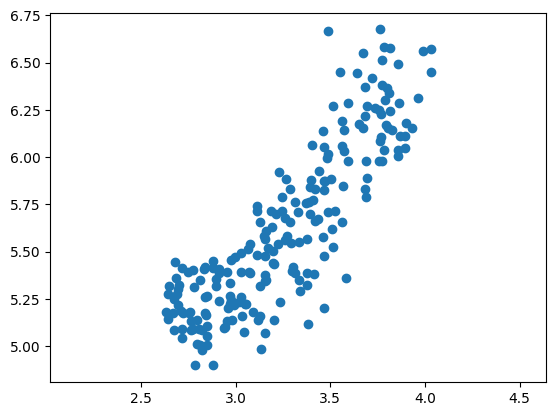

0.8604149377143469


In [30]:
#1. Import pearsonr from scipy.stats.
from scipy.stats import pearsonr

#2. Assign column 0 of grains to width and column 1 of grains to length.
width = grains[:,0]
length = grains[:,1]

#3. Make a scatter plot with width on the x-axis and length on the y-axis.
plt.scatter(width, length)
plt.axis('equal')
plt.show()

#4. Use the pearsonr() function to calculate the Pearson correlation of width and length.
correlation, pvalue = pearsonr(width, length)
print(correlation)

Removing Correlation from Grain Measurements Using PCA
----

Apply Principal Component Analysis (PCA) to the grains dataset to transform the correlated width and length features into uncorrelated components. After the transformation, plot the resulting PCA features to visualize the decorrelation. Finally, compute the Pearson correlation coefficient of the transformed features to confirm that the correlation has been removed.

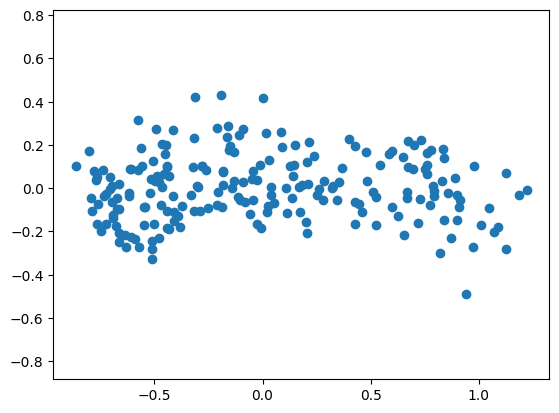

-5.359753439682091e-15


In [31]:
#1. Import PCA from sklearn.decomposition.
from sklearn.decomposition import PCA

#2. Create an instance of PCA called model.
model = PCA()

#3. Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.
pca_features = model.fit_transform(grains)

#4. The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns.
xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs, ys)
print(correlation)

Identifying and Visualizing the First Principal Component
----

Use PCA to find the direction of maximum variance in the grains dataset, which contains the length and width measurements of grain samples. Fit the PCA model to the data and extract the first principal component. Then, plot the original data points using a scatter plot and overlay an arrow representing the first principal component to show the primary direction of variation in the data.

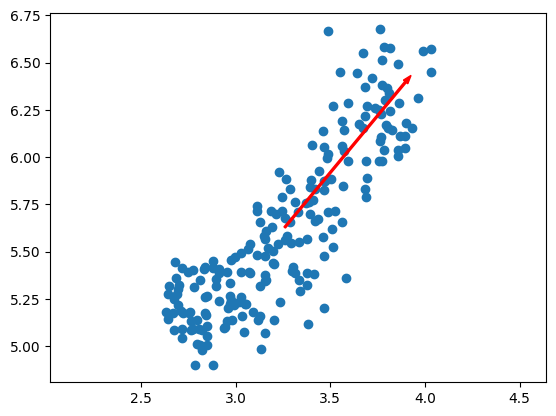

In [32]:
#1. Make a scatter plot of the grain measurements.
plt.scatter(width, length)


#2. Create a PCA instance called model1
model1 = PCA()

#3. Fit the model to the grains data.
model1.fit(grains)

#4. Extract the coordinates of the mean of the data using the .mean_ attribute of model.
mean = model1.mean_

#5. Get the first principal component of model using the .components_[0,:] attribute.
first_pc = model1.components_[0,:]

#6. Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.axis('equal')
plt.show()


Variance of the PCA features
----
Begin by standardizing the samples array, which contains 6-dimensional measurements for each fish. Then apply PCA to the standardized data and compute the variance explained by each principal component. Plot these variances to observe how much information each component captures. This helps identify the intrinsic dimension of the dataset—the number of components needed to retain most of the variance.

In [36]:
fish_df = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\fish.csv", header=None)
samples = fish_df.drop(columns=[0]).values
samples.shape

(85, 6)

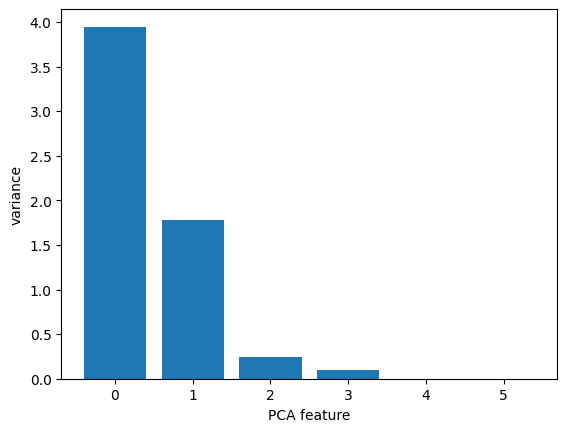

In [37]:
#1. Create an instance of StandardScaler called scaler.
scaler = StandardScaler()

#2. Create a PCA instance called pca.
pca = PCA()

#3. Use the make_pipeline() function to create a pipeline chaining scaler and pca.
pipeline = make_pipeline(scaler, pca)

#4. Use the .fit() method of pipeline to fit it to the fish samples.
pipeline.fit(samples)


#5. Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
features = range(pca.n_components_)

#6. Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Reducing Dimensions of Fish Data with PCA
----
Use PCA to reduce the dimensionality of the fish dataset from 6 features to 2 principal components. Apply PCA to the scaled_samples array, which contains the standardized measurements. Retain only the two components that capture the most variance. This transformation simplifies the dataset while preserving its most important structure for further analysis or visualization.

In [ ]:
#2. Create a PCA instance called pca_f with n_components=2.
pca_f = PCA(n_components = 2)

#3. Use the .fit() method of pca_f to fit it to the scaled fish measurements scaled_samples.